In [1]:
using PyPlot
using CSV
using DataFrames
using HypothesisTests

matplotlib.use("TkAgg") #Allow IJulia to make plots in separate window

In [2]:
#Load main dataset into dataframe
file_path = "/gpfs/data/biol1555/projects2022/team04/data/inpatient_full_0427.csv"

data = CSV.File(file_path; header = 1, delim = "|") |> DataFrame

,PATIENT,ENCOUNTER,DURATION
,String,String,Int64
1,e1cab30e-e134-4b9b-95cf-79703aef434c,c1262f94-2b8b-4318-9a1f-365d94db2319,14
2,a84d194b-8aa2-4ec4-a784-0c9377c29b9a,c8240eb4-b218-4139-a350-e143c9a8a186,14
3,6a09d092-6425-424b-9425-197ae69fca26,d898bbc6-1f06-447a-a550-1a4011ff2ad6,8
4,8a4ff5cf-9c99-40ba-8fb2-aabab6e183e2,fd1aa46b-68ea-4c5a-8357-37f88ec251b3,13
5,7e461309-caa5-4c8a-9787-bdeff351c59d,b85cda70-268f-46d4-a143-724dcfb79db3,14
6,ccd56967-c6af-401e-8cfc-c7e4423767cd,f5a8b4c4-2447-4c4e-a8aa-0c6ffdee75ed,17
7,b2c6a7c8-5b88-4717-a0d9-acbafeca2251,885c7a91-0edc-4e2e-8795-18687cd2f999,7
8,d775d4ce-6b47-4089-9f3f-14b35adcab70,cdc6b1b6-ae20-434b-819e-78f6758d8ba5,17
9,fcf940b7-1c4a-4ce0-ba4b-13549767000f,fe2593a1-ddf3-40fb-a367-952aaf83a920,14


In [20]:
print(names(data))

["PATIENT", "ENCOUNTER", "DURATION", "ICU", "OUTCOME", "RACE", "ETHNICITY", "GENDER", "AGE", "BODY_WEIGHT", "DIASTOLIC_BP", "SYSTOLIC_BP", "HEART_RATE", "RESPIRATORY_RATE", "O2_SAT", "HEMATOCRIT", "SODIUM", "POTASSIUM", "CALCIUM", "CHLORIDE", "CO2", "UREA_NITROGEN", "GLUCOSE", "SERUM_FERRITIN", "CARDIAC_TROPONIN", "LACTATE_DEHYDROGENASE", "D_DIMER", "HYPERTENSION", "DIABETES"]

In [56]:
#Create two DFs that contain pos and neg patients
pos = data[in(1).(data.OUTCOME),:]
neg = data[in(0).(data.OUTCOME),:]

#Pull out the single lab value to be plotted
plot_data = [neg[!,"GLUCOSE"],pos[!,"GLUCOSE"]]

2-element Vector{Vector{Float64}}:
 [116.4, 74.9, 74.2, 111.3, 115.2, 84.2, 105.4, 112.3, 116.8, 117.2  …  84.8, 86.8, 76.3, 64.2, 65.8, 65.7, 65.2, 86.1, 68.4, 80.9]
 [101.0, 84.5, 98.1, 66.3, 76.8, 66.7, 65.5, 67.1, 97.6, 117.2  …  76.1, 75.8, 93.2, 88.0, 78.2, 82.6, 88.1, 81.4, 98.0, 75.4]

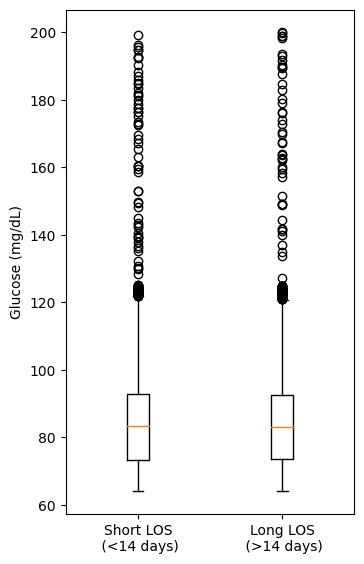

In [52]:
fig, axs = plt.subplots()

fig.set_size_inches(4, 6)

axs.boxplot(plot_data,labels = ["Short LOS\n (<14 days)","Long LOS\n (>14 days)"])
axs.set_ylabel("Glucose (mg/dL)")
fig.tight_layout(pad=2)


In [54]:
fig.savefig("glucose_boxplot.pdf",dpi=300)

In [55]:
#Compare means of physiological variables by LOS using t-test
EqualVarianceTTest(neg[!,"GLUCOSE"],pos[!,"GLUCOSE"])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.206003
    95% confidence interval: (-0.1953, 0.6073)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3143

Details:
    number of observations:   [9363,8814]
    t-statistic:              1.0062259278532422
    degrees of freedom:       18175
    empirical standard error: 0.20472789578659692


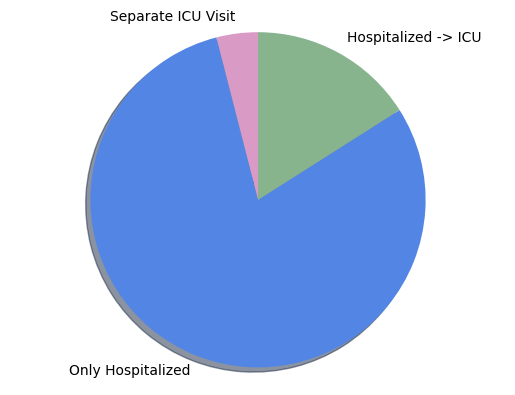

(-1.1050771889299855, 1.1050771869667702, -1.1048464070722326, 1.1002307895493235)

In [57]:
#Numbers for calculating percentages
total = 18177 #all hospitalized
both = 2912
hosp = 14500
other = 765

label = ["Separate ICU Visit","Only Hospitalized","Hospitalized -> ICU"]
sizes = [.04,.80,.16]
#explode = [0,0.1,0]
cols = ["#D99AC5","#5386E4","#87B38D"]

fig,ax1 = plt.subplots()


ax1.pie(sizes,labels=label,shadow="FALSE", startangle=90,colors=cols)
ax1.axis("equal")

#plt.show()



In [136]:
fig.savefig("pt_transfers_pie.pdf",dpi=300)

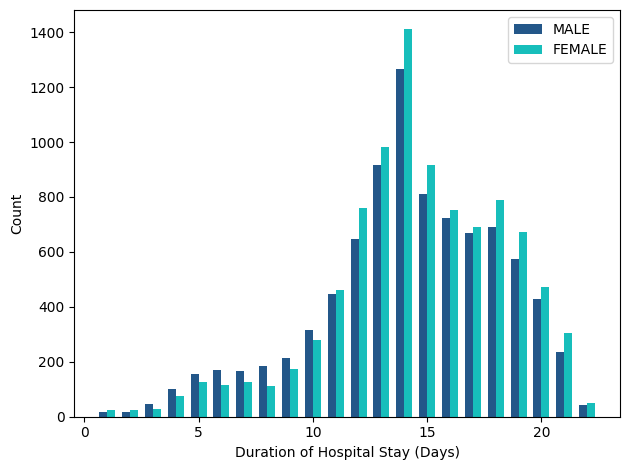

In [58]:
#Calculate durations for men and women
plot_data = combine(groupby(data, [:GENDER, :DURATION]), nrow => :count)

male_counts = plot_data[1:22,:]
female_counts = plot_data[23:44,:]

fig,ax1 = plt.subplots()

loc = collect(range(1,22,step=1))
width = .35
 
ax1.bar(loc .- width/2,male_counts[!,"count"],width,label="MALE",color="#235789")
ax1.bar(loc .+ width/2,female_counts[!,"count"],width,label="FEMALE",color="#17BEBB")
ax1.set_ylabel("Count")
ax1.set_xlabel("Duration of Hospital Stay (Days)")

ax1.legend()

fig.tight_layout()

#ax1.bar(male_counts[!,"DURATION"],male_counts[!,"count"],align = "center")
#ax1.bar(female_counts[!,"DURATION"],female_counts[!,"count"],align = "center",alpha=.5)



In [130]:
fig.savefig("sex_distribution.pdf",dpi=300)

In [59]:
ApproximateTwoSampleKSTest(male_counts[!,"count"],female_counts[!,"count"])

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /users/zlevin2/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167


Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.181818

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8603

Details:
    number of observations:   [22,22]
    KS-statistic:              0.6030226891555273


In [60]:
plt.close("all")

In [61]:
#Group patients by race and calculate distribution of LOS
race_data = combine(groupby(data, [:RACE, :DURATION]), nrow => :count)

#print(race_data[!,"RACE"])


,RACE,DURATION,count
,String7,Int64,Int64
1,white,1,38
2,white,2,37
3,white,3,56
4,white,4,143
5,white,5,238
6,white,6,246
7,white,7,247
8,white,8,249
9,white,9,317


In [63]:
#Add 0s to any race if they had no patients for a certain duration
#This is necessary for plotting
function add_missing_days(df)
    race = df[!,:RACE][1]
    for day in collect(range(1,22,step=1))
        if !(day in df[!, :DURATION])
            row = DataFrame(RACE = race, DURATION = day, count = 0)
            append!(df,row)
        end
    end
    return sort!(df,[:DURATION])
end

#Ugly and redundant function to calculate racial percentages at each hosp. duration
function get_percentages(white,black,asian,native,other)
    white_percentages = zeros(0)
    black_percentages = zeros(0)
    asian_percentages = zeros(0)
    native_percentages = zeros(0)
    other_percentages = zeros(0)
    
    for day in collect(range(1,22,step=1))
        total = white[white[!,:DURATION] .== day,:count] + 
        black[black[!,:DURATION] .== day,:count] +
        asian[asian[!,:DURATION] .== day,:count] +
        native[native[!,:DURATION] .== day,:count] +
        other[other[!,:DURATION] .== day,:count]
        
        white_percent = (white[white[!,:DURATION] .== day,:count] / total)
        black_percent = (black[black[!,:DURATION] .== day,:count] / total)
        
        asian_percent = (asian[asian[!,:DURATION] .== day,:count] / total)
        native_percent = (native[native[!,:DURATION] .== day,:count] / total)
        other_percent = (other[other[!,:DURATION] .== day,:count] / total)
        
        append!(white_percentages,white_percent)
        append!(black_percentages,black_percent)
        append!(asian_percentages,asian_percent)
        append!(native_percentages,native_percent)
        append!(other_percentages,other_percent)
    end
    perc = DataFrame(white = white_percentages,
        black = black_percentages,
    asian = asian_percentages,
    native = native_percentages,
    other = other_percentages)
    return(perc)
end

get_percentages (generic function with 1 method)

In [64]:
native_counts = add_missing_days(race_data[race_data[!,:RACE] .== "native",:])
white_counts = race_data[race_data[!,:RACE] .== "white",:]
black_counts = race_data[race_data[!,:RACE] .== "black",:]
asian_counts = add_missing_days(race_data[race_data[!,:RACE] .== "asian",:])
other_counts = add_missing_days(race_data[race_data[!,:RACE] .== "other",:])

,RACE,DURATION,count
,String7,Int64,Int64
1,other,1,0
2,other,2,0
3,other,3,0
4,other,4,1
5,other,5,2
6,other,6,1
7,other,7,0
8,other,8,2
9,other,9,0


In [66]:
percs = get_percentages(white_counts,black_counts,asian_counts,native_counts,other_counts)

,white,black,asian,native,other
,Float64,Float64,Float64,Float64,Float64
1,0.926829,0.0243902,0.0243902,0.0243902,0.0
2,0.860465,0.139535,0.0,0.0,0.0
3,0.756757,0.0810811,0.162162,0.0,0.0
4,0.80791,0.112994,0.0734463,0.0,0.00564972
5,0.838028,0.0739437,0.0774648,0.00352113,0.00704225
6,0.863158,0.0701754,0.0596491,0.00350877,0.00350877
7,0.843003,0.0750853,0.0716724,0.0102389,0.0
8,0.838384,0.0740741,0.0774411,0.003367,0.00673401
9,0.81701,0.0902062,0.0850515,0.00773196,0.0


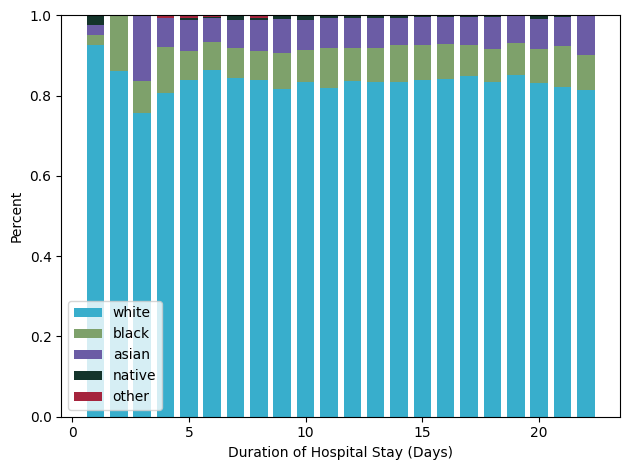

In [67]:
fig,ax1 = plt.subplots()

loc = collect(range(1,22,step=1))
width = .75

""" 
ax1.bar(loc .- .3,white_counts[!,"count"],width,label="white")
ax1.bar(loc .- .15,black_counts[!,"count"],width,label="black")
ax1.bar(loc,asian_counts[!,"count"],width,label="asian")
ax1.bar(loc .+ .15,native_counts[!,"count"],width,label="native")
ax1.bar(loc .+ .3,other_counts[!,"count"],width,label="other")"""

a = percs[!,"white"] + percs[!,"black"]
b = percs[!,"white"] + percs[!,"black"] + percs[!,"asian"]
c = percs[!,"white"] + percs[!,"black"] + percs[!,"asian"] + percs[!,"native"]
ax1.bar(loc,percs[!,"white"],width,label="white",color="#38AECC")
ax1.bar(loc,percs[!,"black"],width,label="black",bottom = percs[!,"white"],color="#7EA16B")
ax1.bar(loc,percs[!,"asian"],width,label="asian",bottom=a,color="#6B5CA5")
ax1.bar(loc,percs[!,"native"],width,label="native",bottom=b,color="#14342B")
ax1.bar(loc,percs[!,"other"],width,label="other",bottom=c,color="#A5243D")


#ax1.bar(loc .+ width/2,female_counts[!,"count"],width,label="FEMALE")
ax1.set_ylabel("Percent")
ax1.set_xlabel("Duration of Hospital Stay (Days)")

ax1.legend()

fig.tight_layout()

#plt.show()

In [126]:
fig.savefig("race_distribution.png",dpi=300)

In [68]:
ApproximateTwoSampleKSTest(white_counts[!,:count],native_counts[!,:count])

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /users/zlevin2/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167


Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          1.0

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-09

Details:
    number of observations:   [22,22]
    KS-statistic:              3.316624790355399


In [69]:
ApproximateTwoSampleKSTest(white_counts[!,:count],black_counts[!,:count])

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /users/zlevin2/.julia/packages/HypothesisTests/Dvf6v/src/kolmogorov_smirnov.jl:167


Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.727273

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   [22,22]
    KS-statistic:              2.4120907566221086
